# BRFSS dataset

## Overview

Behavioral Risk Factor Surveillance System (BRFSS) is a large-scale collaborative project between all of the states in the United States (US) and the Centers for Disease Control and Prevention (CDC). The BRFSS is a system of **ongoing health-related telephone surveys designed to collect data on health-related risk behaviors, chronic health conditions, and use of preventive services** from the noninstitutionalized adult population ≥ 18 years residing in the United States BRFSS now collects data in all 50 states as well as the District of Columbia and participating US territories. Factors assessed by the BRFSS in 2016 included health status, healthy days/health-related quality of life, health care access, exercise, inadequate sleep, chronic health conditions, oral health, tobacco use, e-cigarettes, alcohol consumption, immunization, falls, seat belt use, drinking and driving, breast- and cervical cancer screening, prostate cancer screening, colorectal cancer screening, and HIV/AIDS knowledge. **All responses are self-reported.**

# Setup

In [2]:
! pip install xport pyhdb

You are using pip version 7.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pyhdb as hana
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
fname = './brfss/llcp_2016.csv'
orig_df = pd.read_csv(fname, error_bad_lines=False)
orig_df.head()

b'Skipping line 63662: expected 275 fields, saw 276\n'
b'Skipping line 66843: expected 275 fields, saw 276\n'
b'Skipping line 109644: expected 275 fields, saw 276\nSkipping line 109948: expected 275 fields, saw 276\n'
b'Skipping line 112738: expected 275 fields, saw 276\n'
b'Skipping line 162934: expected 275 fields, saw 276\n'
b'Skipping line 164329: expected 275 fields, saw 276\n'
b'Skipping line 168142: expected 275 fields, saw 276\nSkipping line 168601: expected 275 fields, saw 276\n'
b'Skipping line 171220: expected 275 fields, saw 276\n'
b'Skipping line 172836: expected 275 fields, saw 276\n'
b'Skipping line 176056: expected 275 fields, saw 276\n'
b'Skipping line 228856: expected 275 fields, saw 276\n'
b'Skipping line 229799: expected 275 fields, saw 276\nSkipping line 229926: expected 275 fields, saw 276\n'
b'Skipping line 232068: expected 275 fields, saw 276\nSkipping line 232121: expected 275 fields, saw 276\nSkipping line 232593: expected 275 fields, saw 276\n'
b'Skipping lin

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5021,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
0,1.0,1.0,1072016,1,7,2016,1100.0,2016000001,2.016000e+09,1.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1.0,1.0,1112016,1,11,2016,1100.0,2016000002,2.016000e+09,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,2.0
2,1.0,1.0,1062016,1,6,2016,1100.0,2016000003,2.016000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1.0,1.0,1082016,1,8,2016,1100.0,2016000004,2.016000e+09,1.0,...,NaN,NaN,1.0,2.0,1.0,2.0,NaN,2.0,1.0,9.0
4,1.0,1.0,1052016,1,5,2016,1100.0,2016000005,2.016000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [5]:
orig_df.describe()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_MAM5021,_RFPAP33,_RFPSA21,_RFBLDS3,_COL10YR,_HFOB3YR,_FS5YR,_FOBTFS,_CRCREC,_AIDTST3
count,486263.000000,486263.000000,4.862630e+05,486263.000000,486263.000000,486263.000000,486263.000000,4.862630e+05,4.862630e+05,252993.0,...,132034.000000,102377.000000,151839.000000,234771.000000,230123.000000,234771.000000,110997.000000,213778.000000,231138.000000,453282.000000
mean,28.973241,6.756541,6.886972e+06,6.738245,14.671114,2016.028758,1113.389668,2.016007e+09,2.016007e+09,1.0,...,1.216997,1.197681,2.130731,1.904260,1.326491,1.830797,1.975044,1.996010,1.289442,1.975382
std,15.959655,3.342728,3.372013e+06,3.370344,8.325683,0.167126,34.054162,6.916046e+03,6.916046e+03,0.0,...,0.412202,0.398252,2.067161,0.294235,0.468930,0.374932,0.155991,0.063041,0.453504,1.493900
min,1.000000,1.000000,1.012017e+06,1.000000,1.000000,2016.000000,1100.000000,2.016000e+09,2.016000e+09,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,15.000000,4.000000,4.112016e+06,4.000000,8.000000,2016.000000,1100.000000,2.016002e+09,2.016002e+09,1.0,...,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,27.000000,7.000000,7.112016e+06,7.000000,14.000000,2016.000000,1100.000000,2.016005e+09,2.016005e+09,1.0,...,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,40.000000,10.000000,1.004202e+07,10.000000,21.000000,2016.000000,1100.000000,2.016009e+09,2.016009e+09,1.0,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,78.000000,12.000000,1.231202e+07,12.000000,31.000000,2017.000000,1200.000000,2.016037e+09,2.016037e+09,1.0,...,2.000000,2.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000


In [34]:
orig_df.describe(include=['O'])

,DLYOTHER
count,2265
unique,1819
top,cost
freq,56


In [6]:
columns = [
'_STATE',
'GENHLTH',
'MENTHLTH',
'POORHLTH',
'SLEPTIM1',
'ASTHMA3',
'CHCOCNCR',
'CHCCOPD1',
'ADDEPEV2',
'HLTHPLN1',
#'AGE',
'MARITAL',
'EDUCA',
'EMPLOY1',
'INCOME2',
'WEIGHT2',
'DECIDE',
'MARIJANA',
'USEMRJNA'
]

In [70]:
df = orig_df[columns]
df.head()

,_STATE,GENHLTH,MENTHLTH,POORHLTH,SLEPTIM1,ASTHMA3,CHCOCNCR,CHCCOPD1,ADDEPEV2,MARITAL,EDUCA,EMPLOY1,INCOME2,WEIGHT2,DECIDE,MARIJANA,USEMRJNA
0,1.0,1.0,88.0,NaN,5.0,2.0,2.0,2.0,2.0,1.0,4.0,1.0,5.0,135.0,2.0,NaN,NaN
1,1.0,2.0,88.0,NaN,6.0,2.0,2.0,2.0,1.0,1.0,4.0,5.0,7.0,153.0,2.0,NaN,NaN
2,1.0,3.0,1.0,88.0,9.0,2.0,2.0,2.0,2.0,3.0,5.0,7.0,7.0,120.0,2.0,NaN,NaN
3,1.0,3.0,88.0,NaN,7.0,2.0,2.0,2.0,2.0,1.0,6.0,7.0,7.0,220.0,2.0,NaN,NaN
4,1.0,5.0,3.0,3.0,6.0,1.0,2.0,2.0,2.0,5.0,4.0,1.0,77.0,125.0,2.0,NaN,NaN


In [8]:
df.describe()

,_STATE,GENHLTH,MENTHLTH,POORHLTH,SLEPTIM1,ASTHMA3,CHCOCNCR,CHCCOPD1,ADDEPEV2,MARITAL,EDUCA,EMPLOY1,INCOME2,WEIGHT2,DECIDE,MARIJANA,USEMRJNA
count,486263.000000,486258.000000,486262.000000,250578.000000,486261.000000,486261.000000,486261.000000,486261.000000,486260.000000,486252.000000,486257.000000,486190.000000,482477.000000,480085.000000,472560.000000,106810.000000,5401.000000
mean,28.973241,2.589915,64.376203,55.720135,7.906871,1.880961,1.915671,1.940291,1.848310,2.288503,4.912929,3.968745,19.163102,720.376571,1.936876,84.291256,351.631920
std,15.959655,1.120603,35.916811,38.002935,7.987075,0.453800,0.405054,0.454947,0.533292,1.698862,1.072103,2.884356,30.917412,2171.443057,0.571318,16.297193,5389.424602
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000
25%,15.000000,2.000000,25.000000,12.000000,6.000000,2.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000,5.000000,150.000000,2.000000,88.000000,1.000000
50%,27.000000,3.000000,88.000000,88.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,3.000000,7.000000,177.000000,2.000000,88.000000,1.000000
75%,40.000000,3.000000,88.000000,88.000000,8.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.000000,7.000000,8.000000,210.000000,2.000000,88.000000,7.000000
max,78.000000,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9999.000000,9.000000,99.000000,123456.000000


In [71]:
df["MARIJANA"].value_counts(dropna=False)

NaN      379453
 88.0    100649
 30.0      1725
 1.0        723
 2.0        652
 77.0       398
 99.0       355
 10.0       321
 5.0        301
 20.0       285
 15.0       277
 3.0        266
 4.0        227
 25.0       136
 7.0         82
 6.0         74
 8.0         65
 28.0        56
 12.0        47
 9.0         37
 14.0        32
 29.0        21
 27.0        19
 16.0        11
 21.0         9
 18.0         9
 26.0         8
 22.0         6
 17.0         5
 24.0         4
 23.0         4
 13.0         3
 11.0         2
 19.0         1
Name: MARIJANA, dtype: int64

In [72]:
mj_df = df[df['MARIJANA'].notnull()]
len(mj_df)

106810

In [73]:
mj_df.head()

,_STATE,GENHLTH,MENTHLTH,POORHLTH,SLEPTIM1,ASTHMA3,CHCOCNCR,CHCCOPD1,ADDEPEV2,MARITAL,EDUCA,EMPLOY1,INCOME2,WEIGHT2,DECIDE,MARIJANA,USEMRJNA
7031,2.0,2.0,88.0,NaN,6.0,2.0,2.0,2.0,2.0,3.0,6.0,7.0,6.0,160.0,2.0,88.0,NaN
7032,2.0,2.0,88.0,4.0,8.0,2.0,1.0,2.0,2.0,2.0,4.0,1.0,8.0,140.0,2.0,1.0,1.0
7034,2.0,2.0,1.0,10.0,8.0,1.0,1.0,1.0,1.0,3.0,5.0,8.0,4.0,225.0,2.0,88.0,NaN
7035,2.0,3.0,88.0,88.0,7.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,8.0,220.0,2.0,88.0,NaN
7036,2.0,1.0,88.0,NaN,8.0,2.0,2.0,2.0,2.0,1.0,6.0,7.0,7.0,185.0,2.0,88.0,NaN


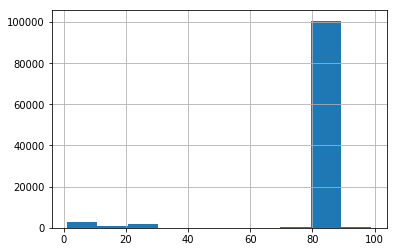

In [11]:
df['MARIJANA'].hist()

In [12]:
len(df[df["USEMRJNA"] < 7])

4048

In [13]:
len(df[df["MARIJANA"] <= 30])

5408

In [14]:
mj_bins = [
    35,  # in the last 30 days (active consumption)
    90   # no usage in last 30 days
]

mj_df['MARIJANA_USER'] = mj_df['MARIJANA'].apply(lambda v: v <= 30)
mj_df['MARIJANA_USER'].value_counts()

/Users/janusch/venv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    101402
True       5408
Name: MARIJANA_USER, dtype: int64

/Users/janusch/venv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


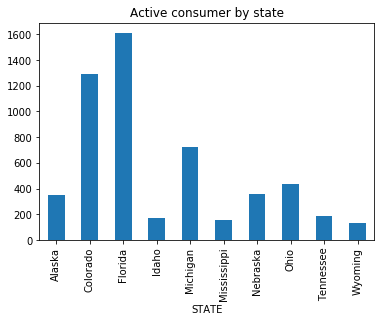

In [15]:
states = {
    2: "Alaska",
    8: "Colorado",
    12: "Florida",
    16: "Idaho",
    27: "Michigan",
    28: "Mississippi",
    31: "Nebraska",
    39: "Ohio",
    47: "Tennessee",
    56: "Wyoming"
}

mj_df['STATE'] = mj_df['_STATE'].apply(lambda v: states[v])

mj_by_state = mj_df.groupby(['STATE']).MARIJANA_USER.sum()
mj_by_state.plot(kind='bar', title='Active consumer by state')

In [16]:
# Now thinking about your mental health, which includes stress, depression, and problems with emotions, for
# how many days during the past 30 days was your mental health not good?
mh_mapping = {
    88: 0,  # None => all good
    77: 1  # Don't know => minor issues
}

mj_df['MENTAL_ISSUES'] = mj_df['MENTHLTH'].apply(lambda v: mh_mapping.get(v, v))
mj_df['MENTAL_ISSUES'].value_counts()

/Users/janusch/venv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.0     73678
30.0     5529
2.0      4924
1.0      4676
5.0      3339
3.0      2798
10.0     2515
15.0     2371
20.0     1436
4.0      1417
7.0      1207
25.0      505
14.0      480
99.0      422
6.0       390
8.0       284
12.0      192
28.0      143
21.0       93
29.0       77
9.0        61
18.0       45
16.0       42
27.0       35
26.0       25
22.0       24
17.0       22
13.0       21
11.0       21
23.0       17
24.0       14
19.0        7
Name: MENTAL_ISSUES, dtype: int64

In [17]:
mj_by_state

STATE
Alaska          350.0
Colorado       1291.0
Florida        1610.0
Idaho           174.0
Michigan        724.0
Mississippi     155.0
Nebraska        358.0
Ohio            433.0
Tennessee       184.0
Wyoming         129.0
Name: MARIJANA_USER, dtype: float64

In [18]:
mj_mh_df = mj_df[mj_df["MENTAL_ISSUES"] != 99.0]

In [19]:
mj_df.corr()

,_STATE,GENHLTH,MENTHLTH,POORHLTH,SLEPTIM1,ASTHMA3,CHCOCNCR,CHCCOPD1,ADDEPEV2,MARITAL,EDUCA,EMPLOY1,INCOME2,WEIGHT2,DECIDE,MARIJANA,USEMRJNA,MARIJANA_USER,MENTAL_ISSUES
_STATE,1.000000,0.005501,0.006576,0.017234,-0.017346,-0.001189,-0.001170,-0.008749,-0.013016,-0.026867,-0.019976,-0.033495,-0.025239,-0.007542,-0.001790,0.072632,-0.019569,-0.074344,-0.017785
GENHLTH,0.005501,1.000000,-0.164169,-0.205217,0.059276,-0.092536,-0.089570,-0.132362,-0.147777,0.058455,-0.255680,0.269945,0.007349,0.019154,-0.140603,-0.018207,0.007522,0.022312,0.241310
MENTHLTH,0.006576,-0.164169,1.000000,-0.007775,0.026668,0.068832,-0.005494,0.038916,0.234938,-0.094176,0.001799,0.028392,0.052171,0.019292,0.123892,0.111858,-0.021014,-0.112953,-0.380582
POORHLTH,0.017234,-0.205217,-0.007775,1.000000,0.015765,0.062295,0.022427,0.053411,0.130339,-0.025217,0.007002,-0.114672,0.040390,0.014132,0.112340,0.051697,-0.009756,-0.053745,-0.076565
SLEPTIM1,-0.017346,0.059276,0.026668,0.015765,1.000000,0.021101,0.003117,0.017314,0.007423,0.033075,-0.063541,0.088850,0.073499,0.029711,0.000360,0.010672,-0.006326,-0.010812,0.022831
ASTHMA3,-0.001189,-0.092536,0.068832,0.062295,0.021101,1.000000,0.100482,0.176844,0.151041,-0.018879,0.022337,-0.030715,0.022619,0.007538,0.060795,0.014385,-0.012893,-0.014805,-0.056153
CHCOCNCR,-0.001170,-0.089570,-0.005494,0.022427,0.003117,0.100482,1.000000,0.121711,0.089750,0.035624,0.005801,-0.108667,0.002506,0.018494,0.035673,-0.025833,0.006628,0.026781,0.003091
CHCCOPD1,-0.008749,-0.132362,0.038916,0.053411,0.017314,0.176844,0.121711,1.000000,0.133928,0.003115,0.059402,-0.103978,0.025403,0.014772,0.071030,0.003881,0.006683,-0.003696,-0.052710
ADDEPEV2,-0.013016,-0.147777,0.234938,0.130339,0.007423,0.151041,0.089750,0.133928,1.000000,-0.026518,0.030559,-0.061201,0.054511,0.025991,0.182836,0.048172,-0.025707,-0.049811,-0.186309
MARITAL,-0.026867,0.058455,-0.094176,-0.025217,0.033075,-0.018879,0.035624,0.003115,-0.026518,1.000000,-0.095143,0.003838,0.035933,0.013995,-0.032395,-0.121889,0.021247,0.127492,0.077454


/Users/janusch/venv/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


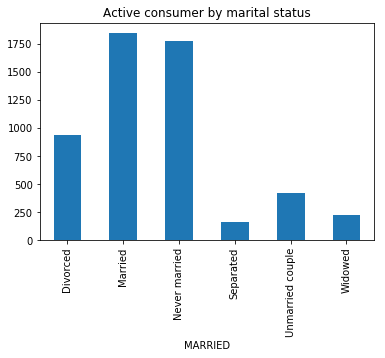

In [20]:
married = {
    1: "Married",
    2: "Divorced",
    3: "Widowed",
    4: "Separated",
    5: "Never married",
    6: "Unmarried couple",
}

mj_married_df = mj_df[mj_df['MARITAL'] < 9]
mj_married_df['MARRIED'] = mj_married_df['MARITAL'].apply(lambda v: married[v])

mj_by_marital = mj_married_df.groupby(['MARRIED']).MARIJANA_USER.sum()
mj_by_marital.plot(kind='bar', title='Active consumer by marital status')

In [21]:
# (Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or
# minor depression?
mj_dep_df = mj_df[mj_df['ADDEPEV2'] <= 2]

yes = len(mj_dep_df[mj_dep_df['ADDEPEV2'] == 1])
no = len(mj_dep_df[mj_dep_df['ADDEPEV2'] == 2])

mj_by_dep = mj_dep_df.groupby(['ADDEPEV2']).MARIJANA_USER.sum()
mj_by_dep

ADDEPEV2
1.0    1585.0
2.0    3792.0
Name: MARIJANA_USER, dtype: float64

In [22]:
mj_by_dep[1] / yes

0.086569446720192261

In [23]:
mj_by_dep[2] / no

0.043050304826129898

In [4]:
fname = './brfss/llcp_2015.csv'
orig_df2015 = pd.read_csv(fname, error_bad_lines=False)
orig_df2015.head()

b'Skipping line 1107: expected 330 fields, saw 332\nSkipping line 1594: expected 330 fields, saw 332\nSkipping line 1669: expected 330 fields, saw 331\n'
b'Skipping line 3992: expected 330 fields, saw 331\n'
b'Skipping line 5543: expected 330 fields, saw 331\n'
b'Skipping line 7321: expected 330 fields, saw 331\nSkipping line 7405: expected 330 fields, saw 331\nSkipping line 8100: expected 330 fields, saw 331\n'
b'Skipping line 11844: expected 330 fields, saw 331\n'
b'Skipping line 13342: expected 330 fields, saw 331\nSkipping line 14227: expected 330 fields, saw 331\n'
b'Skipping line 15162: expected 330 fields, saw 332\nSkipping line 15294: expected 330 fields, saw 331\nSkipping line 16001: expected 330 fields, saw 331\n'
b'Skipping line 18013: expected 330 fields, saw 331\nSkipping line 18370: expected 330 fields, saw 331\n'
b'Skipping line 19420: expected 330 fields, saw 331\nSkipping line 19698: expected 330 fields, saw 331\nSkipping line 20173: expected 330 fields, saw 331\n'
b'S

b'Skipping line 271775: expected 330 fields, saw 331\nSkipping line 272270: expected 330 fields, saw 331\n'
b'Skipping line 273264: expected 330 fields, saw 331\nSkipping line 273537: expected 330 fields, saw 331\nSkipping line 274458: expected 330 fields, saw 331\nSkipping line 274505: expected 330 fields, saw 331\n'
b'Skipping line 275343: expected 330 fields, saw 331\nSkipping line 275763: expected 330 fields, saw 331\nSkipping line 275879: expected 330 fields, saw 331\n'
b'Skipping line 277127: expected 330 fields, saw 331\nSkipping line 277542: expected 330 fields, saw 332\nSkipping line 278345: expected 330 fields, saw 331\n'
b'Skipping line 280935: expected 330 fields, saw 332\nSkipping line 281049: expected 330 fields, saw 331\nSkipping line 281995: expected 330 fields, saw 331\n'
b'Skipping line 283372: expected 330 fields, saw 333\n'
b'Skipping line 284953: expected 330 fields, saw 331\nSkipping line 285096: expected 330 fields, saw 331\n'
b'Skipping line 290118: expected 330

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,1292015,1,29,2015,1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,1202015,1,20,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,2012015,2,1,2015,1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,1142015,1,14,2015,1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [6]:
orig_df2015['MARIJANA']

KeyError: 'MARIJANA'

# NSDUH State Estimates

In [2]:
fname = './samhsa/state.csv'
samsha_df = pd.read_csv(fname, error_bad_lines=False)
samsha_df.head()

,outcome,bsae,low_sae,up_sae,year,area,state,agegrp,group
0,ABODALC,0.075936,0.073492,0.078454,3,0,-5,0,NaN
1,ABODALC,0.058777,0.055892,0.061801,3,0,-5,1,NaN
2,ABODALC,0.174325,0.169431,0.179329,3,0,-5,2,NaN
3,ABODALC,0.061170,0.058231,0.064247,3,0,-5,3,NaN
4,ABODALC,0.077954,0.075265,0.080730,3,0,-5,4,NaN


In [3]:
len(samsha_df)

83552

In [4]:
samsha_df["_year_end"] = samsha_df["year"].apply(lambda v: 2000+int(v))

In [5]:
samsha_df.tail()

,outcome,bsae,low_sae,up_sae,year,area,state,agegrp,group,_year_end
83547,TOBMON,0.330635,0.303168,0.359307,15,2,56,4,5.0,2015
83548,TXREC3,0.138946,0.108630,0.176053,15,2,56,2,4.0,2015
83549,TXREC3,0.156233,0.135087,0.180000,15,2,56,3,3.0,2015
83550,TXREC3,0.153733,0.135020,0.174517,15,2,56,4,3.0,2015
83551,U_ALCMON,0.215927,0.186500,0.248579,15,2,56,5,3.0,2015


In [6]:
age_min_map = {
    0: 12,
    1: 12,
    5: 12,
    4: 18,
    3: 18,
    2: 26
}

age_max_map = {
    # 99 => no limit
    0: 99,
    1: 17,
    2: 20,
    5: 99,
    4: 25,
    3: 99,
}

samsha_df["_agegrp_min"] = samsha_df["agegrp"].apply(lambda v: age_min_map[v])
samsha_df["_agegrp_max"] = samsha_df["agegrp"].apply(lambda v: age_max_map[v])

In [7]:
samsha_df.tail()

,outcome,bsae,low_sae,up_sae,year,area,state,agegrp,group,_year_end,_agegrp_min,_agegrp_max
83547,TOBMON,0.330635,0.303168,0.359307,15,2,56,4,5.0,2015,18,25
83548,TXREC3,0.138946,0.108630,0.176053,15,2,56,2,4.0,2015,26,20
83549,TXREC3,0.156233,0.135087,0.180000,15,2,56,3,3.0,2015,18,99
83550,TXREC3,0.153733,0.135020,0.174517,15,2,56,4,3.0,2015,18,25
83551,U_ALCMON,0.215927,0.186500,0.248579,15,2,56,5,3.0,2015,12,99


In [8]:
# Don't need state groups (west, east, etc)
samsha_df = samsha_df[samsha_df['state'] > 0]

In [9]:
len(samsha_df)

76092

In [10]:
state_map = {
    '1': {
        'title': 'Alabama',
        'group': 'state_a_f'
    },
    '2': {
        'title': 'Alaska',
        'group': 'state_a_f'
    },
    '4': {
        'title': 'Arizona',
        'group': 'state_a_f'
    },
    '5': {
        'title': 'Arkansas',
        'group': 'state_a_f'
    },
    '6': {
        'title': 'California',
        'group': 'state_a_f'
    },
    '8': {
        'title': 'Colorado',
        'group': 'state_a_f'
    },
    '9': {
        'title': 'Connecticut',
        'group': 'state_a_f'
    },
    '10': {
        'title': 'Delaware',
        'group': 'state_a_f'
    },
    '11': {
        'title': 'District of Columbia',
        'group': 'state_a_f'
    },
    '12': {
        'title': 'Florida',
        'group': 'state_a_f'
    },
    '13': {
        'title': 'Georgia',
        'group': 'state_g_l'
    },
    '15': {
        'title': 'Hawaii',
        'group': 'state_g_l'
    },
    '16': {
        'title': 'Idaho',
        'group': 'state_g_l'
    },
    '17': {
        'title': 'Illinois',
        'group': 'state_g_l'
    },
    '18': {
        'title': 'Indiana',
        'group': 'state_g_l'
    },
    '19': {
        'title': 'Iowa',
        'group': 'state_g_l'
    },
    '20': {
        'title': 'Kansas',
        'group': 'state_g_l'
    },
    '21': {
        'title': 'Kentucky',
        'group': 'state_g_l'
    },
    '22': {
        'title': 'Louisiana',
        'group': 'state_g_l'
    },
    '23': {
        'title': 'Maine',
        'group': 'state_m'
    },
    '24': {
        'title': 'Maryland',
        'group': 'state_m'
    },
    '25': {
        'title': 'Massachusetts',
        'group': 'state_m'
    },
    '26': {
        'title': 'Michigan',
        'group': 'state_m'
    },
    '27': {
        'title': 'Minnesota',
        'group': 'state_m'
    },
    '28': {
        'title': 'Mississippi',
        'group': 'state_m'
    },
    '29': {
        'title': 'Missouri',
        'group': 'state_m'
    },
    '30': {
        'title': 'Montana',
        'group': 'state_m'
    },
    '31': {
        'title': 'Nebraska',
        'group': 'state_n'
    },
    '32': {
        'title': 'Nevada',
        'group': 'state_n'
    },
    '33': {
        'title': 'New Hampshire',
        'group': 'state_n'
    },
    '34': {
        'title': 'New Jersey',
        'group': 'state_n'
    },
    '35': {
        'title': 'New Mexico',
        'group': 'state_n'
    },
    '36': {
        'title': 'New York',
        'group': 'state_n'
    },
    '37': {
        'title': 'North Carolina',
        'group': 'state_n'
    },
    '38': {
        'title': 'North Dakota',
        'group': 'state_n'
    },
    '39': {
        'title': 'Ohio',
        'group': 'state_o_t'
    },
    '40': {
        'title': 'Oklahoma',
        'group': 'state_o_t'
    },
    '41': {
        'title': 'Oregon',
        'group': 'state_o_t'
    },
    '42': {
        'title': 'Pennsylvania',
        'group': 'state_o_t'
    },
    '44': {
        'title': 'Rhode Island',
        'group': 'state_o_t'
    },
    '45': {
        'title': 'South Carolina',
        'group': 'state_o_t'
    },
    '46': {
        'title': 'South Dakota',
        'group': 'state_o_t'
    },
    '47': {
        'title': 'Tennessee',
        'group': 'state_o_t'
    },
    '48': {
        'title': 'Texas',
        'group': 'state_o_t'
    },
    '49': {
        'title': 'Utah',
        'group': 'state_u_w'
    },
    '50': {
        'title': 'Vermont',
        'group': 'state_u_w'
    },
    '51': {
        'title': 'Virginia',
        'group': 'state_u_w'
    },
    '53': {
        'title': 'Washington',
        'group': 'state_u_w'
    },
    '54': {
        'title': 'West Virginia',
        'group': 'state_u_w'
    },
    '55': {
        'title': 'Wisconsin',
        'group': 'state_u_w'
    },
    '56': {
        'title': 'Wyoming',
        'group': 'state_u_w'
    }
}

samsha_df["_state"] = samsha_df["state"].apply(lambda v: state_map[str(v)]['title'])

In [11]:
samsha_df.tail()

,outcome,bsae,low_sae,up_sae,year,area,state,agegrp,group,_year_end,_agegrp_min,_agegrp_max,_state
83547,TOBMON,0.330635,0.303168,0.359307,15,2,56,4,5.0,2015,18,25,Wyoming
83548,TXREC3,0.138946,0.108630,0.176053,15,2,56,2,4.0,2015,26,20,Wyoming
83549,TXREC3,0.156233,0.135087,0.180000,15,2,56,3,3.0,2015,18,99,Wyoming
83550,TXREC3,0.153733,0.135020,0.174517,15,2,56,4,3.0,2015,18,25,Wyoming
83551,U_ALCMON,0.215927,0.186500,0.248579,15,2,56,5,3.0,2015,12,99,Wyoming


In [12]:
samsha_df.to_csv('./samhsa/samsha_states.csv')

In [14]:
# Transform outcome values to columns (pick bsae values)


fname = './legal_status_discrete.csv'
legal_df = pd.read_csv(fname, error_bad_lines=False, sep=';')
legal_df.head()

,State,Possession for Recreational Use,Sale for Recreational Use,Sale for Medical Use,Possesion for Medical Use
0,Alabama,felony,felony,legal,with restrictions
1,Alaska,legal,legal,legal,allowed
2,Arizona,felony,felony,legal,allowed
3,Arkansas,felony,felony,legal,allowed
4,California,legal,legal,legal,allowed


In [15]:
legal_df["Possession for Recreational Use"].value_counts()

felony            15
decriminalized    13
misdemeanor       13
legal              9
Name: Possession for Recreational Use, dtype: int64

In [18]:
legal_states_df = legal_df[legal_df["Possession for Recreational Use"] == "legal"]
decr_states_df = legal_df[legal_df["Possession for Recreational Use"] == "decriminalized"]
misd_states_df = legal_df[legal_df["Possession for Recreational Use"] == "misdemeanor"]
felony_states_df = legal_df[legal_df["Possession for Recreational Use"] == "felony"]

In [19]:
legal_states_df

,State,Possession for Recreational Use,Sale for Recreational Use,Sale for Medical Use,Possesion for Medical Use
1,Alaska,legal,legal,legal,allowed
4,California,legal,legal,legal,allowed
5,Colorado,legal,legal,legal,allowed
18,Maine,legal,legal,legal,allowed
20,Massachusetts,legal,legal,legal,allowed
27,Nevada,legal,legal,legal,allowed
36,Oregon,legal,legal,legal,allowed
44,Vermont,legal,felony,legal,allowed
46,Washington,legal,legal,legal,allowed


In [20]:
samsha_df.tail()

,outcome,bsae,low_sae,up_sae,year,area,state,agegrp,group,_year_end,_agegrp_min,_agegrp_max,_state
83547,TOBMON,0.330635,0.303168,0.359307,15,2,56,4,5.0,2015,18,25,Wyoming
83548,TXREC3,0.138946,0.108630,0.176053,15,2,56,2,4.0,2015,26,20,Wyoming
83549,TXREC3,0.156233,0.135087,0.180000,15,2,56,3,3.0,2015,18,99,Wyoming
83550,TXREC3,0.153733,0.135020,0.174517,15,2,56,4,3.0,2015,18,25,Wyoming
83551,U_ALCMON,0.215927,0.186500,0.248579,15,2,56,5,3.0,2015,12,99,Wyoming


# BRFSS 2016 marijuana consumers

In [81]:
mj_df = df[df['MARIJANA'].notnull()]

In [82]:
mj_df['MARIJANA'].value_counts()

88.0    100649
30.0      1725
1.0        723
2.0        652
77.0       398
99.0       355
10.0       321
5.0        301
20.0       285
15.0       277
3.0        266
4.0        227
25.0       136
7.0         82
6.0         74
8.0         65
28.0        56
12.0        47
9.0         37
14.0        32
29.0        21
27.0        19
16.0        11
21.0         9
18.0         9
26.0         8
22.0         6
17.0         5
23.0         4
24.0         4
13.0         3
11.0         2
19.0         1
Name: MARIJANA, dtype: int64

In [83]:
# <30: valid answer
# 88: no consumption
mj_df = mj_df[(mj_df['MARIJANA'] <= 30) | (mj_df['MARIJANA'] == 88)]
mj_df['MARIJANA'] = mj_df['MARIJANA'].apply(lambda v: 0 if v == 88 else v)

In [84]:
mj_df['MARIJANA'].value_counts()

0.0     100649
30.0      1725
1.0        723
2.0        652
10.0       321
5.0        301
20.0       285
15.0       277
3.0        266
4.0        227
25.0       136
7.0         82
6.0         74
8.0         65
28.0        56
12.0        47
9.0         37
14.0        32
29.0        21
27.0        19
16.0        11
18.0         9
21.0         9
26.0         8
22.0         6
17.0         5
24.0         4
23.0         4
13.0         3
11.0         2
19.0         1
Name: MARIJANA, dtype: int64

In [85]:
mj_df['MARIJANA_BINARY'] = mj_df['MARIJANA'].apply(lambda v: v > 0)
mj_df['MARIJANA_BINARY'].value_counts()

False    100649
True       5408
Name: MARIJANA_BINARY, dtype: int64

In [86]:
mj_bins = [
    -1,
    0,
    5,  # sometimes
    10,  # regular
    20,  # often
    30,  # daily
]
# 0->no users, 4-> 20-30 days
mj_df['MARIJANA_GRP'] = pd.cut(mj_df['MARIJANA'], mj_bins, labels=np.arange(len(mj_bins)-1))
mj_df['MARIJANA_GRP'].value_counts()

0    100649
1      2169
4      1988
3       672
2       579
Name: MARIJANA_GRP, dtype: int64

## Normalizing target variables


In [116]:
INVALID_VALUE = np.nan

In [119]:
# Now thinking about your mental health, which includes stress, depression, and problems with emotions, for
# how many days during the past 30 days was your mental health not good?
mh_mapping = {
    88: 0,  # None => all good
    77: 1,  # Don't know => minor issues
    99: INVALID_VALUE
}

mj_df['MENTAL_ISSUES'] = mj_df['MENTHLTH'].apply(lambda v: mh_mapping.get(v, v))
mj_df['MENTAL_ISSUES'].value_counts(dropna=False)

 0.0     73366
 30.0     5469
 2.0      4896
 1.0      4478
 5.0      3321
 3.0      2777
 10.0     2494
 15.0     2340
 20.0     1424
 4.0      1409
 7.0      1199
 25.0      504
 14.0      477
NaN        410
 6.0       386
 8.0       280
 12.0      188
 28.0      142
 21.0       92
 29.0       75
 9.0        60
 18.0       45
 16.0       41
 27.0       33
 26.0       25
 22.0       24
 17.0       22
 13.0       21
 11.0       21
 23.0       17
 24.0       14
 19.0        7
Name: MENTAL_ISSUES, dtype: int64

In [143]:
# (Ever told) you have chronic obstructive pulmonary disease, emphysema or chronic bron
mapping = {
    1: 1, # Yes
    2: 0, # No
    7: INVALID_VALUE,
    9: INVALID_VALUE
}

mj_df['_COPD'] = mj_df['CHCCOPD1'].apply(lambda v: mapping.get(v, v))
mj_df['_COPD'].value_counts(dropna=False)

 0.0    96495
 1.0     9116
NaN       446
Name: _COPD, dtype: int64

In [144]:
# (Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or
# minor depression?
mapping = {
    1: 1, # Yes
    2: 0, # No
    7: INVALID_VALUE,
    9: INVALID_VALUE
}

mj_df['_DEP'] = mj_df['ADDEPEV2'].apply(lambda v: mapping.get(v, v))
mj_df['_DEP'].value_counts(dropna=False)

 0.0    87520
 1.0    18145
NaN       392
Name: _DEP, dtype: int64

In [123]:
# Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating,
# remembering, or making decisions?

mapping = {
    1: 1, # Yes
    2: 0, # No
    7: INVALID_VALUE,
    9: INVALID_VALUE
}

mj_df['_DECIDE'] = mj_df['DECIDE'].apply(lambda v: mapping.get(v, v))
mj_df['_DECIDE'].value_counts(dropna=False)

 0.0    94251
 1.0    11263
NaN       543
Name: _DECIDE, dtype: int64

In [145]:
# On average, how many hours of sleep do you get in a 24-hour period?

mapping = {
    77: INVALID_VALUE,
    99: INVALID_VALUE
}
mj_df['_SLEEP'] = mj_df['SLEPTIM1'].apply(lambda v: mapping.get(v, v))
mj_df['_SLEEP'].value_counts(dropna=False)

 8.0     32763
 7.0     30797
 6.0     21467
 5.0      6507
 9.0      5131
 4.0      2799
 10.0     2610
NaN       1305
 12.0      825
 3.0       720
 2.0       332
 1.0       234
 11.0      169
 14.0       85
 15.0       84
 16.0       79
 13.0       46
 18.0       45
 20.0       31
 24.0       13
 17.0        5
 22.0        3
 21.0        3
 19.0        2
 23.0        2
Name: _SLEEP, dtype: int64

In [126]:
# During the past 30 days, for about how many days did poor physical or mental health keep you from doing your
# usual activities, such as self-care, work, or recreation?

mapping = {
    88: 0,
    77: INVALID_VALUE,
    99: INVALID_VALUE
}
mj_df['_POORHLTH'] = mj_df['POORHLTH'].apply(lambda v: mapping.get(v, v))
mj_df['_POORHLTH'].value_counts(dropna=False)

NaN      54205
 0.0     29496
 30.0     4968
 2.0      2783
 1.0      2445
 5.0      1802
 15.0     1750
 3.0      1684
 10.0     1626
 20.0     1120
 4.0       976
 7.0       937
 14.0      491
 25.0      472
 6.0       298
 8.0       227
 12.0      161
 21.0      139
 28.0      112
 9.0        46
 18.0       43
 27.0       34
 17.0       33
 29.0       32
 16.0       32
 26.0       27
 22.0       26
 13.0       23
 24.0       21
 23.0       20
 11.0       18
 19.0       10
Name: _POORHLTH, dtype: int64

In [242]:
# What is the highest grade or year of school you completed?

mapping = {
    9: INVALID_VALUE
}
mj_df['_EDU'] = mj_df['EDUCA'].apply(lambda v: mapping.get(v, v))
mj_df['_EDU'].value_counts(dropna=False)

 6.0    35622
 5.0    31015
 4.0    30955
 3.0     5438
 2.0     2493
NaN       320
 1.0      214
Name: _EDU, dtype: int64

In [253]:
mapping = {
    # No highschool
    1: 0,
    2: 0,
    # Highschool dropout
    3: 1,
    # Highschool grad
    4: 2,
    # College student
    5: 3,
    6: 3
}
mj_df['_EDU2'] = mj_df['_EDU'].apply(lambda v: mapping.get(v, v))
mj_df['_EDU2'].value_counts(dropna=False)

 3.0    66637
 2.0    30955
 1.0     5438
 0.0     2707
NaN       320
Name: _EDU2, dtype: int64

In [130]:
# Employment

mapping = {
    9: INVALID_VALUE
}
mj_df['_EMPLOY'] = mj_df['EMPLOY1'].apply(lambda v: mapping.get(v, v))
mj_df['_EMPLOY'].value_counts(dropna=False)

 1.0    41351
 7.0    34614
 2.0     9707
 8.0     7916
 5.0     5708
 6.0     2216
 4.0     1929
 3.0     1919
NaN       697
Name: _EMPLOY, dtype: int64

In [131]:
# Income

mapping = {
    77: INVALID_VALUE,
    99: INVALID_VALUE
}
mj_df['_INCOME'] = mj_df['INCOME2'].apply(lambda v: mapping.get(v, v))
mj_df['_INCOME'].value_counts(dropna=False)

 8.0    26388
NaN     15850
 7.0    14682
 6.0    13651
 5.0    10573
 4.0     9356
 3.0     7008
 2.0     4725
 1.0     3824
Name: _INCOME, dtype: int64

# Target variables by marijuana usage
Note: this is only short-term usage within the last 30 days, so we can't tell which effects are permanent

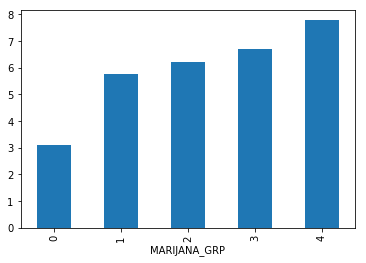

In [147]:
# Now thinking about your mental health, which includes stress, depression, and problems with emotions, for
# how many days during the past 30 days was your mental health not good?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['MENTAL_ISSUES'].mean().plot(kind='bar')

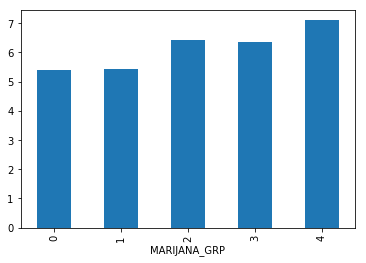

In [148]:
# During the past 30 days, for about how many days did poor physical or mental health keep you from doing your
# usual activities, such as self-care, work, or recreation?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_POORHLTH'].mean().plot(kind='bar')

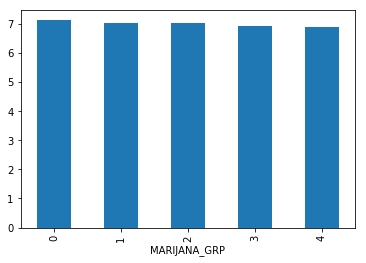

In [149]:
# On average, how many hours of sleep do you get in a 24-hour period?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_SLEEP'].mean().plot(kind='bar')

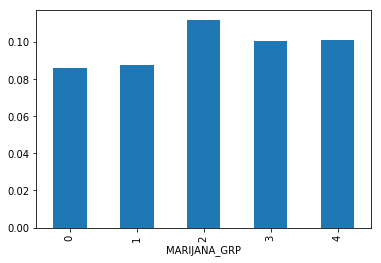

In [150]:
# (Ever told) you have Chronic Obstructive Pulmonary Disease or COPD, emphysema or chronic bronchitis?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_COPD'].mean().plot(kind='bar')

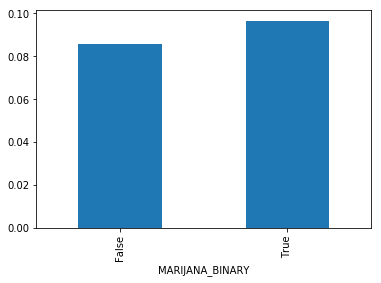

In [151]:
var_by_mj_group = mj_df.groupby(['MARIJANA_BINARY'])['_COPD'].mean().plot(kind='bar')

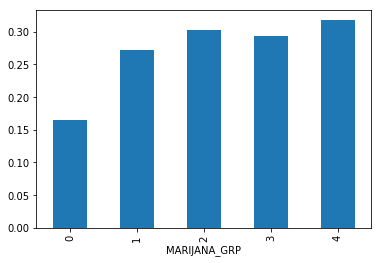

In [161]:
# (Ever told) you that you have a depressive disorder, including depression, major depression, dysthymia, or
# minor depression?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_DEP'].mean().plot(kind='bar')

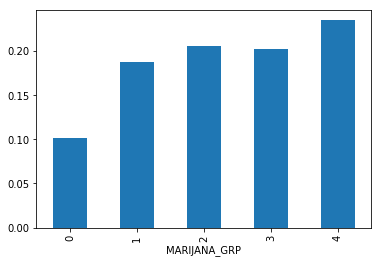

In [167]:
# Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating,
# remembering, or making decisions?
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_DECIDE'].mean().plot(kind='bar')

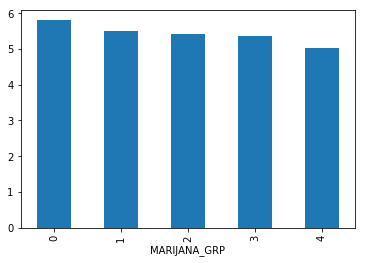

In [168]:
# Is your annual household income from all sources: (If respondent refuses at any income level, code ´Refused.´)
var_by_mj_group = mj_df.groupby(['MARIJANA_GRP'])['_INCOME'].mean().plot(kind='bar')

In [169]:
mj_df['_INCOME'].value_counts()

8.0    26388
7.0    14682
6.0    13651
5.0    10573
4.0     9356
3.0     7008
2.0     4725
1.0     3824
Name: _INCOME, dtype: int64

In [212]:
income_counts = mj_df[['MARIJANA_GRP', '_INCOME']].groupby(['MARIJANA_GRP','_INCOME']).size().reset_index().rename(columns={0:'COUNT'})
income_pivot = income_counts.pivot(index='_INCOME', columns='MARIJANA_GRP', values='COUNT')

income_pivot

MARIJANA_GRP,0,1,2,3,4
_INCOME,,,,,
1.0,3456,144,41,50,133
2.0,4357,124,38,51,155
3.0,6570,157,48,41,192
4.0,8791,210,49,63,243
5.0,10001,209,55,62,246
6.0,12925,282,75,90,279
7.0,13999,281,76,85,241
8.0,25271,531,139,152,295


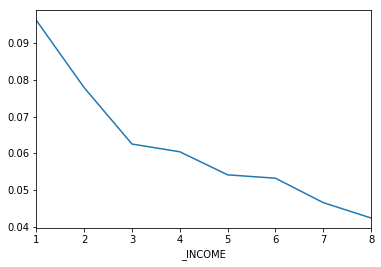

In [219]:
mj_df.groupby(['_INCOME'])['MARIJANA_BINARY'].mean().plot()

In [ ]:
mj_df.groupby(['_INCOME'])['MARIJANA_BINARY'].mean().plot()

In [205]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

def normalize_pct(df):
    result = df.copy()
    for feature_name in df.columns:
        sum_value = df[feature_name].sum()
        result[feature_name] = df[feature_name] / sum_value
    return result

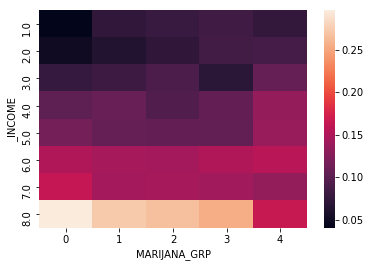

In [215]:
sns.heatmap(normalize_pct(income_pivot))

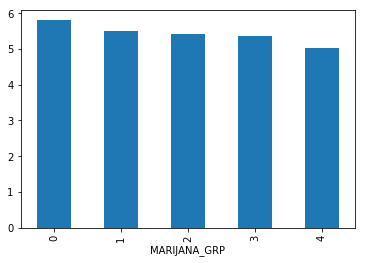

In [221]:
mj_df.groupby(['MARIJANA_GRP'])['_INCOME'].mean().plot(kind='bar')

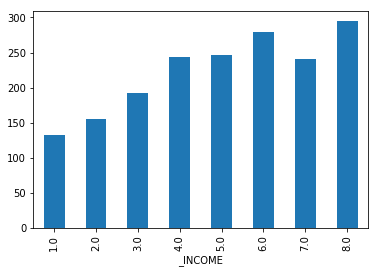

In [239]:
#mj_df[mj_df['MARIJANA_GRP'] == 4]['_INCOME'].plot(kind='scatter')
# x=income, y=pct

#mj_df[mj_df['MARIJANA_GRP'] == 4].plot.scatter(x='BMI', y='SystolicBP', color='blue', alpha=.1)
mj_df[mj_df['MARIJANA_GRP'] == 4].groupby('_INCOME').size().plot(kind='bar')

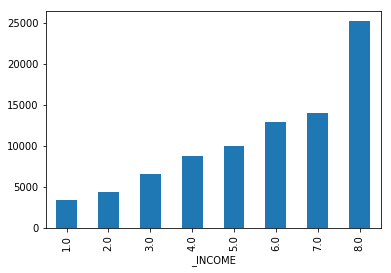

In [240]:
mj_df[mj_df['MARIJANA_GRP'] == 0].groupby('_INCOME').size().plot(kind='bar')

In [256]:
# What is the highest grade or year of school you completed?
edu_counts = mj_df[['MARIJANA_GRP', '_EDU2']].groupby(['MARIJANA_GRP','_EDU2']).size().reset_index().rename(columns={0:'COUNT'})
edu_pivot = edu_counts.pivot(index='_EDU2', columns='MARIJANA_GRP', values='COUNT')
edu_pivot

MARIJANA_GRP,0,1,2,3,4
_EDU2,,,,,
0.0,2631,31,4,8,33
1.0,5030,138,44,40,186
2.0,29279,622,153,198,703
3.0,63399,1375,374,425,1064


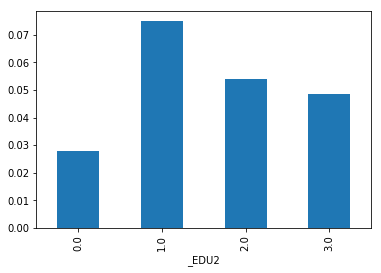

In [255]:
# 1->some highschool, don't know if dropout or still in highschool
mj_df.groupby(['_EDU2'])['MARIJANA_BINARY'].mean().plot(kind='bar')

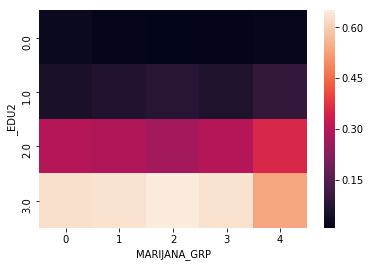

In [258]:
sns.heatmap(normalize_pct(edu_pivot))
# Education distribution is relatively even among groups of marijana users
# Except for almost daily users which include less college students

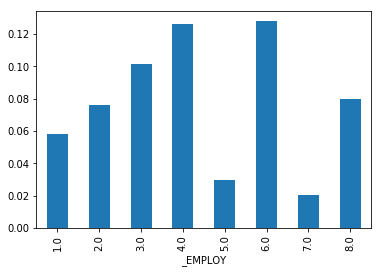

In [259]:
# Employment
mj_df.groupby('_EMPLOY')['MARIJANA_BINARY'].mean().plot(kind='bar')

In [262]:
emp_counts = mj_df[['MARIJANA_GRP', '_EMPLOY']].groupby(['MARIJANA_GRP','_EMPLOY']).size().reset_index().rename(columns={0:'COUNT'})
emp_pivot = emp_counts.pivot(index='_EMPLOY', columns='MARIJANA_GRP', values='COUNT')
emp_pivot

MARIJANA_GRP,0,1,2,3,4
_EMPLOY,,,,,
1.0,38956,949,262,283,901
2.0,8968,304,63,91,281
3.0,1724,60,25,28,82
4.0,1685,85,19,38,102
5.0,5539,69,22,16,62
6.0,1932,154,21,42,67
7.0,33908,300,99,101,206
8.0,7286,234,57,68,271


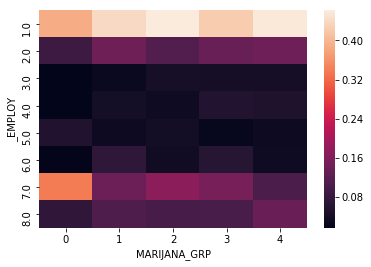

In [263]:
sns.heatmap(normalize_pct(emp_pivot))

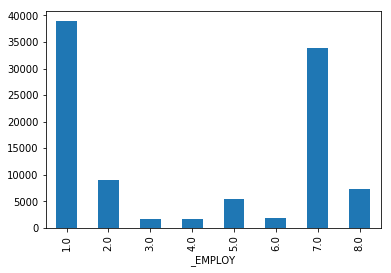

In [266]:
mj_df[mj_df['MARIJANA_GRP'] == 0].groupby('_EMPLOY').size().plot(kind='bar')

In [267]:
len(mj_df[mj_df['MARIJANA_GRP'] == 0])

100649

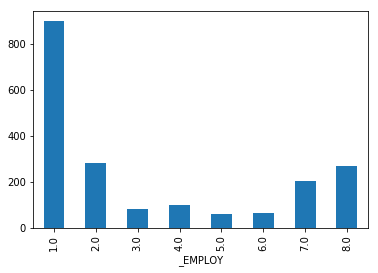

In [268]:
mj_df[mj_df['MARIJANA_GRP'] == 4].groupby('_EMPLOY').size().plot(kind='bar')